***AUTHORS: JACKSON DAVIDSON AND MARCEL SALAZAR***

***MINI PROJECT***

We used the Iris Dataset from http://archive.ics.uci.edu/ml/index.php. We chose to do classification as this best fit the dataset and the two we used were Support Vector Machines (SVM) and  Random Forests (RF).

We imported the Iris Dataset into python using the appropriate pip install command for sklearn. Afterwards, we imported the classifier models that we used. Then, we started training the models to predict data as accurately as possible. We measured our data by looking at the accuracy that it was giving us and F1. After thorough evaluation of our data, the next step was to visualize our plots. And that is how we finalized our algorithms.


RANDOM FOREST:
The height of the bars can represent the importance of different features in predicting the target variable. This can help identify which features have the most impact on the outcome. If you have multiple categories within a feature, the bar plot can compare the importance or performance of these categories. Learning how to work with this algorithm has definitely impacted the way we interact with dataset visualization and how to work with them.


**THIS IS FOR RANDOM FOREST**

             feature  importance
2  petal length (cm)    0.456606
3   petal width (cm)    0.430128
0  sepal length (cm)    0.086058
1   sepal width (cm)    0.027208




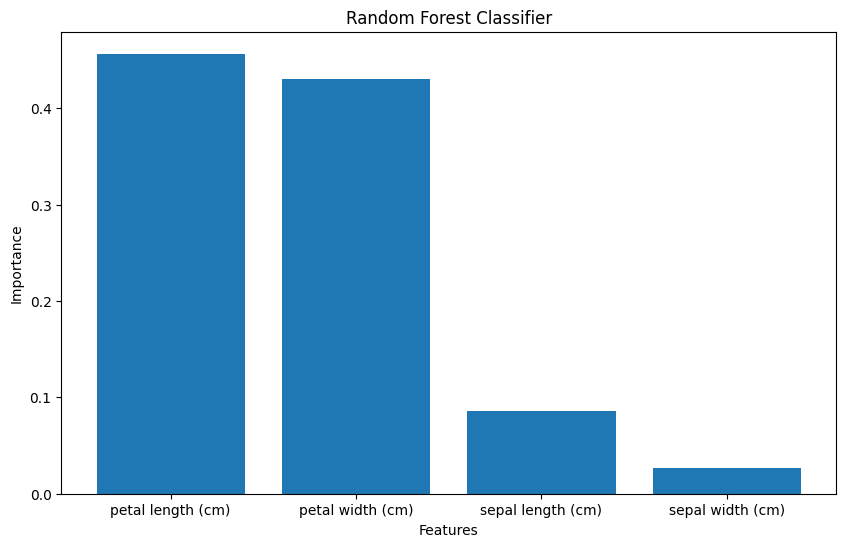



F1 Score: 0.9663650075414781
accuracy: 0.9703703703703703


recall: 0.9666666666666667


Confusion Matrix:
[[15  0  0]
 [ 0  8  0]
 [ 0  1  6]]


In [ ]:
# using random forest classifier
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
# Load Iris dataset
iris = load_iris()
# Split dataset into features (X) and target (y)
X = iris.data
y = iris.target
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100)
# Train the classifier
clf.fit(X_train, y_train)
# Predict the target
y_pred = clf.predict(X_test)
# Feature importance
feature_importances = clf.feature_importances_
# Create a DataFrame
df = pd.DataFrame({'feature': iris.feature_names, 'importance': feature_importances})
# Sort the DataFrame
df = df.sort_values(by='importance', ascending=False)
# Display the DataFrame
print(df)
print("\n")
# Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(df['feature'], df['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Classifier')
plt.show()

print("\n")

# getting the f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

# getting the precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print('accuracy:', precision)
print("\n")

# getting the recall score
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted')
print('recall:', recall)
print("\n")

# getting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

**THIS IS FOR SVM**


SUPPORT VECTOR MACHINE:
SVM is great for data that has clear separations between them. It attempts to clearly stratify data and maximize the margins, or hyperlanes, between the classes. As y was 0, 1, or 2 this was a perfect dataset to use SVM on. With a regularization parameter to balance between maximizing the margin and minimizing classification error, SVM can accurately classify new data points based on their position relative to the hyperplane.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


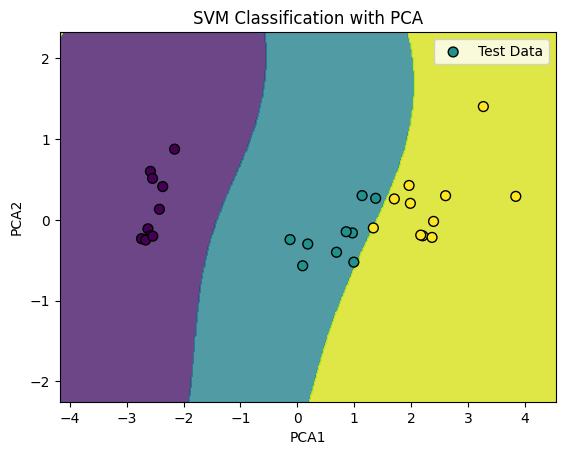

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

#Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize an SVM classifier with a radial basis function (RBF) kernel
clf = SVC(kernel='rbf', gamma='auto')

#Train the classifier
clf.fit(X_train, y_train)

#Predict on the test data
y_pred = clf.predict(X_test)

#Evaluate the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Visualize the results with PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#Train a new SVM on the reduced dataset (just for visualization)
clf_vis = SVC(kernel='rbf', gamma='auto')
clf_vis.fit(X_train_pca, y_train)

#Create a mesh to plot the decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Plot decision boundaries
Z = clf_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', marker='o', s=50, linewidth=1, label='Test Data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('SVM Classification with PCA')
plt.legend()
plt.show()

**FINDINGS:**
SVM became better than random forest as the model started gaining more information. Its accuracy, precision, recall, and f1-score are 1 because it was a great fit for the dataset. FR has good results, but not quite as good as SVM.
